In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from proj1_helpers import *
%load_ext autoreload
%autoreload 2


In [2]:
import matplotlib.pyplot as plt

In [3]:
path_tr = "../data/train.csv"
yb_tr, data_tr, ids_tr = load_csv_data(path_tr,False)

In [4]:
yb_tr = column_array(yb_tr)

**Cross-Validation**

In [5]:
nparts = 4
ys, txs, inds, boolind = eq_split_data(yb_tr, data_tr,nparts)

In [41]:
degrees = np.array([4,5,6,7,8])
lambdas = np.power(10,np.linspace(-5,2,8))
#lambdas = np.append(lambdas,np.linspace(0,1,11)[1:])
#lambdas = np.append(lambdas,np.linspace(0,100,11)[1:])

In [42]:
print(lambdas)

[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


In [55]:
max_iters = 1000
gamma = 0.2
batch_size = 10
eps = 1e-1
mode = "log"

In [56]:
losses_tr = np.zeros([len(degrees),len(lambdas),nparts])
losses_te = np.zeros([len(degrees),len(lambdas),nparts])

In [58]:
for ideg, deg in enumerate(degrees):
    for ilam, lambda_ in enumerate(lambdas):
        for part in range(nparts):
            print(ideg,ilam,part)
            # chose parts
            y_tr = yb_tr[boolind[:,part]]
            x_tr = data_tr[boolind[:,part],:]
            y_te = yb_tr[np.logical_not(boolind[:,part])]
            x_te = data_tr[np.logical_not(boolind[:,part]),:]
            # preprocess parts
            tx_tr, mean, std = standardize(x_tr)
            tx_te, mean, std = standardize(x_te,mean,std)
            tx_tr = poly_expansion(tx_tr,deg,True,True)
            tx_te = poly_expansion(tx_te,deg,True,True)
            initial_w = np.ones([tx_tr.shape[1],1])/tx_tr.shape[1]
            # compute w and loss
            w,loss = my_stoch_logistic_regression(y_tr,tx_tr,initial_w,max_iters,gamma,batch_size,mode,lambda_,eps)
            losses_tr[ideg,ilam,part] = compute_loss(y_tr,tx_tr,w, mode='log')
            losses_te[ideg,ilam,part] = compute_loss(y_te,tx_te,w, mode='log')

0 0 0
0 0 1
0 0 2
0 0 3
0 1 0
0 1 1
0 1 2
0 1 3
0 2 0
0 2 1
0 2 2
0 2 3
0 3 0
0 3 1
0 3 2
0 3 3
0 4 0
0 4 1
0 4 2
0 4 3
0 5 0
0 5 1
0 5 2
0 5 3
0 6 0
0 6 1
0 6 2
0 6 3
0 7 0


/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scripts/implementations.py:605: RuntimeWarning: invalid value encountered in true_divide
  sigma = np.divide(x,1+x)
/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scripts/implementations.py:562: RuntimeWarning: overflow encountered in multiply
  a = lambda_*w
/home/joel/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scripts/implementations.py:478: RuntimeWarning: invalid value encountered in subtract
  w = w -gamma*grad
/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scripts/implementations.py:599: RuntimeWarning: invalid value encountered in greater
  large = x>lim
/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scripts/implementations.py:600: RuntimeWarning: invalid value encountered in less
  small = x<-lim
/media/joel/Data/EPFL/PH-M/M3/ml/projects/project1/scri

0 7 1
0 7 2
0 7 3
1 0 0
1 0 1
1 0 2
1 0 3
1 1 0
1 1 1
1 1 2
1 1 3
1 2 0
1 2 1
1 2 2
1 2 3
1 3 0
1 3 1
1 3 2
1 3 3
1 4 0
1 4 1
1 4 2
1 4 3
1 5 0
1 5 1
1 5 2
1 5 3
1 6 0
1 6 1
1 6 2
1 6 3
1 7 0
1 7 1
1 7 2
1 7 3
2 0 0
2 0 1
2 0 2
2 0 3
2 1 0
2 1 1
2 1 2
2 1 3
2 2 0
2 2 1
2 2 2
2 2 3
2 3 0
2 3 1
2 3 2
2 3 3
2 4 0
2 4 1
2 4 2
2 4 3
2 5 0
2 5 1
2 5 2
2 5 3
2 6 0
2 6 1
2 6 2
2 6 3
2 7 0
2 7 1
2 7 2
2 7 3
3 0 0
3 0 1
3 0 2
3 0 3
3 1 0
3 1 1
3 1 2
3 1 3
3 2 0
3 2 1
3 2 2
3 2 3
3 3 0
3 3 1
3 3 2
3 3 3
3 4 0
3 4 1
3 4 2
3 4 3
3 5 0
3 5 1
3 5 2
3 5 3
3 6 0
3 6 1
3 6 2
3 6 3
3 7 0
3 7 1
3 7 2
3 7 3
4 0 0
4 0 1
4 0 2
4 0 3
4 1 0
4 1 1
4 1 2
4 1 3
4 2 0
4 2 1
4 2 2
4 2 3
4 3 0
4 3 1
4 3 2
4 3 3
4 4 0
4 4 1
4 4 2
4 4 3
4 5 0
4 5 1
4 5 2
4 5 3
4 6 0
4 6 1
4 6 2
4 6 3
4 7 0
4 7 1
4 7 2
4 7 3


In [59]:
loss_tr = np.mean(losses_tr,axis=2)
loss_te = np.mean(losses_te,axis=2)

In [60]:
print(loss_tr)
print(loss_te)

[[0.336416 0.33642  0.33628  0.33664  0.339948 0.342336 0.657332 0.657332]
 [0.388392 0.388464 0.388208 0.388104 0.394064 0.39036  0.525476 0.657332]
 [0.351028 0.350984 0.35052  0.34306  0.356724 0.377376 0.657332 0.657332]
 [0.457828 0.457308 0.457404 0.456256 0.455152 0.455752 0.488608 0.657332]
 [0.384312 0.384072 0.383708 0.37796  0.393856 0.347584 0.657332 0.657332]]
[[0.33653333 0.33653333 0.33632267 0.336492   0.339268   0.34160667
  0.657332   0.657332  ]
 [0.38889333 0.38892    0.388504   0.38837067 0.39391333 0.38999733
  0.52609067 0.657332  ]
 [0.35016133 0.35012267 0.34978667 0.34181867 0.355924   0.37661867
  0.657332   0.657332  ]
 [0.45708933 0.45669333 0.45660933 0.455932   0.455052   0.45465067
  0.48823733 0.657332  ]
 [0.38399867 0.38378    0.38351333 0.377464   0.393032   0.345504
  0.657332   0.657332  ]]


In [61]:
from plots import *

Degree =  4
Degree =  5
Degree =  6
Degree =  7
Degree =  8


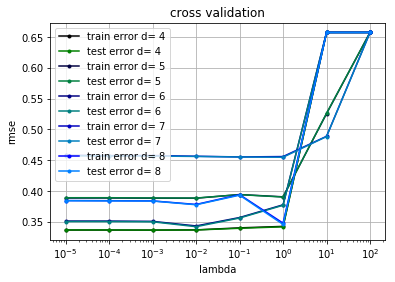

In [62]:
for ideg, deg in enumerate(degrees):
    print("Degree = ",deg)
    cross_validation_visualization(lambdas, loss_tr[ideg,:], loss_te[ideg,:],"d= " +str(deg),([0, 0,ideg/(len(degrees)-1)]),([0, 0.5,ideg/(len(degrees)-1)]))

**Bias-Variance-Decomposition**

In [116]:
degrees = np.array([1,2,3,4,5,6,7,8])
max_iters = 1000
gamma = 0.2
batch_size = 10
eps = 1e-1
mode = "ls"
seeds = np.linspace(1,25,25)
nparts = len(seeds)
ratio = 0.25
lambda_ = 0
print(nparts)
print(seeds)

25
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


In [117]:
bvd_tr = np.zeros([nparts,len(degrees)])
bvd_te = np.zeros([nparts,len(degrees)])

In [118]:
for ideg, deg in enumerate(degrees):
    for ised, seed in enumerate(seeds):
        print(ideg,ised)
        # chose parts
        y_tr,x_tr,y_te,x_te = split_data(yb_tr, data_tr, ratio, int(seed))
        # preprocess parts
        tx_tr, mean, std = standardize(x_tr)
        tx_te, mean, std = standardize(x_te,mean,std)
        tx_tr = poly_expansion(tx_tr,deg,True,True)
        tx_te = poly_expansion(tx_te,deg,True,True)
        # compute w and loss
        w,loss = my_ridge_regression(y_tr,tx_tr,lambda_,mode,max_iters,gamma,batch_size,eps)
        bvd_tr[ised,ideg] = compute_loss(y_tr,tx_tr,w, mode='log')
        bvd_te[ised,ideg] = compute_loss(y_te,tx_te,w, mode='log')

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
5 0
5 1
5 2
5 3
5 4
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
6 0
6 1
6 2
6 3
6 4
6 5
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
7 0
7 1
7 2
7 3
7 4
7 5
7 6
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24


In [119]:
print(degrees.shape)

(8,)


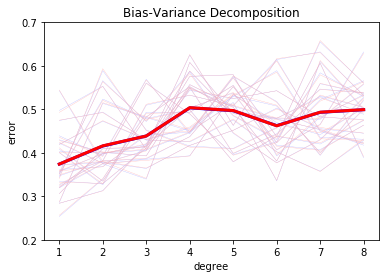

In [120]:
bias_variance_decomposition_visualization(degrees, bvd_tr, bvd_te)